## in the next 4 weeks, will Send-a-Tree possibly reach the 25,000 free-tree sends per day?

we were at 186th day

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

import os

### STEP 1: Put free_tree content into a dataframe

In [2]:
DIR_FREE = '/home/gtrindadi/jds_june_2019/data-sendatree/data-free-tree/'

In [3]:
column_names_sends = ['file_name', 'date', 'user_id', 'event']

free_tree = pd.DataFrame()

# this activity was made when we were with 187 files (days)
for i in range(1, 187+1):
    aux = pd.read_csv(DIR_FREE+'day_'+str(i), delimiter=' ', names=column_names_sends)
    free_tree = pd.concat([free_tree, aux])

In [4]:
free_tree.head()

,file_name,date,user_id,event
0,day_1,2019-01-18,1000100,sent_a_free_tree
1,day_1,2019-01-18,1000096,sent_a_free_tree
2,day_1,2019-01-18,1000037,sent_a_free_tree
3,day_1,2019-01-18,1000037,sent_a_free_tree
4,day_1,2019-01-18,1000037,sent_a_free_tree


In [5]:
free_tree.tail()

,file_name,date,user_id,event
11561,day_187,2019-07-23,1079065,sent_a_free_tree
11562,day_187,2019-07-23,1079065,sent_a_free_tree
11563,day_187,2019-07-23,1072212,sent_a_free_tree
11564,day_187,2019-07-23,1079905,sent_a_free_tree
11565,day_187,2019-07-23,1077537,sent_a_free_tree


### STEP 2: Group the DataFrame by date -- assign it to a new variable

In [6]:
daily_sends_free = free_tree.groupby('date').count()['user_id']

In [7]:
daily_sends_free.head()

date
2019-01-18    298
2019-01-19    414
2019-01-20    480
2019-01-21    673
2019-01-22    686
Name: user_id, dtype: int64

In [8]:
daily_sends_free.tail()

date
2019-07-19    11786
2019-07-20    10509
2019-07-21    10018
2019-07-22    11051
2019-07-23    11566
Name: user_id, dtype: int64

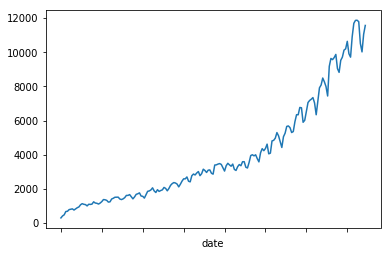

In [9]:
daily_sends_free.plot()

### STEP 3: Formate the data

In [10]:
right_format = pd.Series(daily_sends_free.values)

### STEP 4: The regression part

In [11]:
x = right_format.index
y = right_format.values

In [12]:
coefs = np.polyfit(x, y, 1)
predict = np.poly1d(coefs)

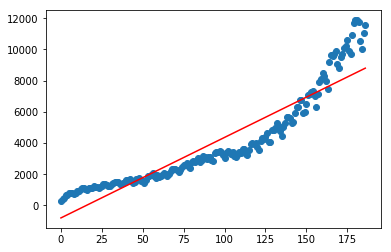

In [19]:
# qty of days = 186
x_test = np.linspace(0, 186)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [20]:
coefs

array([  51.60695371, -800.32370008])

In [21]:
predict(186+28)

10243.56439317475

#### R-squared

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y, predict(x))

0.8548749621298756

## STEP 5: PREDICTION -- ANSWER

In [18]:
x = right_format.index
y = right_format.values

In [34]:
coefs = np.polyfit(x, y, 3)
predict = np.poly1d(coefs)

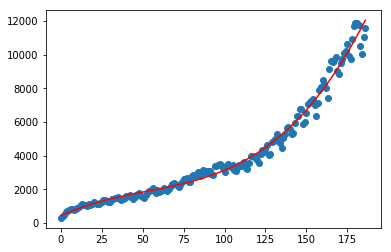

In [35]:
# qty of days = 186
x_test = np.linspace(0, 186)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [36]:
coefs

array([ 3.18407351e-03, -4.98989270e-01,  4.51013370e+01,  4.24708900e+02])

In [37]:
# prediction about 28th day after
predict(186+28)

18429.698133084155

In [38]:
# let's see if 3 polynomial is good
predict(186)

12039.579328531436

In [39]:
# as you can see 12039 (prediction) is pretty close to 11566 (the real number os free tree sends)
right_format.tail()

182    11786
183    10509
184    10018
185    11051
186    11566
dtype: int64